## Importing Dependencies

In [44]:
import os
import cv2
import json
import shutil
import random
from pathlib import Path
import matplotlib.pyplot as plt

## Copying only the translated images from the result of CycleGAN

In [1]:
# Source and destination folders
src_folder = r"F:\New folder\pytorch-CycleGAN-and-pix2pix\results\rgb2ir\test_latest\images"
dst_folder = "./dataset/SeaDronesSee_IR/train"
os.makedirs(dst_folder, exist_ok=True)

# Loop through all files
for filename in os.listdir(src_folder):
    if "_fake_B" in filename:
        src_path = os.path.join(src_folder, filename)
        
        # Remove '_fake_B' from filename
        new_filename = filename.replace("_fake_B", "")
        dst_path = os.path.join(dst_folder, new_filename)
        
        shutil.copy2(src_path, dst_path)

print(f"✅ Copied and renamed all '_fake_B' files to: {dst_folder}")


✅ Copied and renamed all '_fake_B' files to: ./dataset/SeaDronesSee_IR/train


In [2]:
# Source and destination folders
src_folder = r"C:\Users\Lenovo-Z50-70\Downloads\output\results\rgb2ir\test_latest\images"
dst_folder = "./dataset/SeaDronesSee_IR/temp"
os.makedirs(dst_folder, exist_ok=True)

# Loop through all files
for filename in os.listdir(src_folder):
    if "_fake_B" in filename:
        src_path = os.path.join(src_folder, filename)
        
        # Remove '_fake_B' from filename
        new_filename = filename.replace("_fake_B", "")
        dst_path = os.path.join(dst_folder, new_filename)
        
        shutil.copy2(src_path, dst_path)

print(f"✅ Copied and renamed all '_fake_B' files to: {dst_folder}")

✅ Copied and renamed all '_fake_B' files to: ./dataset/SeaDronesSee_IR/temp


In [3]:
# Source and destination folders
src_folder = r"C:\Users\Lenovo-Z50-70\Downloads\output (1)\results\rgb2ir\test_latest\images"
dst_folder = "./dataset/SeaDronesSee_IR/val"
os.makedirs(dst_folder, exist_ok=True)

# Loop through all files
for filename in os.listdir(src_folder):
    if "_fake_B" in filename:
        src_path = os.path.join(src_folder, filename)
        
        # Remove '_fake_B' from filename
        new_filename = filename.replace("_fake_B", "")
        dst_path = os.path.join(dst_folder, new_filename)
        
        shutil.copy2(src_path, dst_path)

print(f"✅ Copied and renamed all '_fake_B' files to: {dst_folder}")


✅ Copied and renamed all '_fake_B' files to: ./dataset/SeaDronesSee_IR/val


## Scaling the annotations from 3840 X 2160 image to 256 X 256 image
The original RGB SeaDronesSee dataset has image of resolution 3840 X 2160 and the translated IR SeaDroneSee using CycleGAN is of 256 X 256 resolution so in order to scale the bbox annotation the following code is used.

In [20]:
# --- Paths ---
input_json = "./dataset/SeaDronesSee_IR/annotations/train_2cat.json"
output_json = "./dataset/SeaDronesSee_IR/annotations/train_padded.json"

# --- Image sizes ---
orig_w, orig_h = 3840, 2160
new_w, new_h = 256, 256
scale_x = new_w / orig_w
scale_y = new_h / orig_h

# --- Padding settings ---
PAD_RATIO = 0.30  # increase bbox size by 10%

# --- Load JSON ---
with open(input_json, "r") as f:
    data = json.load(f)

# --- Update image dimensions ---
for img in data["images"]:
    img["width"] = new_w
    img["height"] = new_h

# --- Scale + Pad annotations ---
for ann in data["annotations"]:
    x, y, w, h = ann["bbox"]

    # Step 1: scale
    x = x * scale_x
    y = y * scale_y
    w = w * scale_x
    h = h * scale_y

    # Step 2: pad
    pad_x = w * PAD_RATIO / 2
    pad_y = h * PAD_RATIO / 2

    x_new = max(0, x - pad_x)
    y_new = max(0, y - pad_y)
    w_new = min(new_w - x_new, w * (1 + PAD_RATIO))
    h_new = min(new_h - y_new, h * (1 + PAD_RATIO))

    # Step 3: round + assign back
    ann["bbox"] = [round(x_new, 2), round(y_new, 2), round(w_new, 2), round(h_new, 2)]
    ann["area"] = round(w_new * h_new, 2)

# --- Save padded JSON ---
with open(output_json, "w") as f:
    json.dump(data, f, indent=2)

print(f"✅ Padded annotation file saved to: {output_json}")
print(f"📏 Each bbox padded by {PAD_RATIO*100:.1f}%")


✅ Padded annotation file saved to: ./dataset/SeaDronesSee_IR/annotations/train_padded.json
📏 Each bbox padded by 30.0%


In [22]:
# --- Paths ---
input_json = "./dataset/SeaDronesSee_IR/annotations/val_2cat.json"
output_json = "./dataset/SeaDronesSee_IR/annotations/val_padded.json"

# --- Image sizes ---
orig_w, orig_h = 3840, 2160
new_w, new_h = 256, 256
scale_x = new_w / orig_w
scale_y = new_h / orig_h

# --- Padding settings ---
PAD_RATIO = 0.30  # increase bbox size by 10%

# --- Load JSON ---
with open(input_json, "r") as f:
    data = json.load(f)

# --- Update image dimensions ---
for img in data["images"]:
    img["width"] = new_w
    img["height"] = new_h

# --- Scale + Pad annotations ---
for ann in data["annotations"]:
    x, y, w, h = ann["bbox"]

    # Step 1: scale
    x = x * scale_x
    y = y * scale_y
    w = w * scale_x
    h = h * scale_y

    # Step 2: pad
    pad_x = w * PAD_RATIO / 2
    pad_y = h * PAD_RATIO / 2

    x_new = max(0, x - pad_x)
    y_new = max(0, y - pad_y)
    w_new = min(new_w - x_new, w * (1 + PAD_RATIO))
    h_new = min(new_h - y_new, h * (1 + PAD_RATIO))

    # Step 3: round + assign back
    ann["bbox"] = [round(x_new, 2), round(y_new, 2), round(w_new, 2), round(h_new, 2)]
    ann["area"] = round(w_new * h_new, 2)

# --- Save padded JSON ---
with open(output_json, "w") as f:
    json.dump(data, f, indent=2)

print(f"✅ Padded annotation file saved to: {output_json}")
print(f"📏 Each bbox padded by {PAD_RATIO*100:.1f}%")


✅ Padded annotation file saved to: ./dataset/SeaDronesSee_IR/annotations/val_padded.json
📏 Each bbox padded by 30.0%


## Changing the image extension from jpg to png in the annotaitons file

In [26]:
# Load your annotation file
with open("./dataset/SeaDronesSee_IR/annotations/train.json", "r") as f:
    data = json.load(f)

# Update file_name for each image
for img in data['images']:
    img['file_name'] = img['file_name'].replace('.jpg', '.png')

# Save the updated annotation file
with open("annotations_updated.json", "w") as f:
    json.dump(data, f, indent=4)

print("✅ All file_name extensions updated to .png")


✅ All file_name extensions updated to .png


In [27]:
# Load your annotation file
with open("./dataset/SeaDronesSee_IR/annotations/val.json", "r") as f:
    data = json.load(f)

# Update file_name for each image
for img in data['images']:
    img['file_name'] = img['file_name'].replace('.jpg', '.png')

# Save the updated annotation file
with open("val.json", "w") as f:
    json.dump(data, f, indent=4)

print("✅ All file_name extensions updated to .png")

✅ All file_name extensions updated to .png


## Visualizing some of the images with bboxes

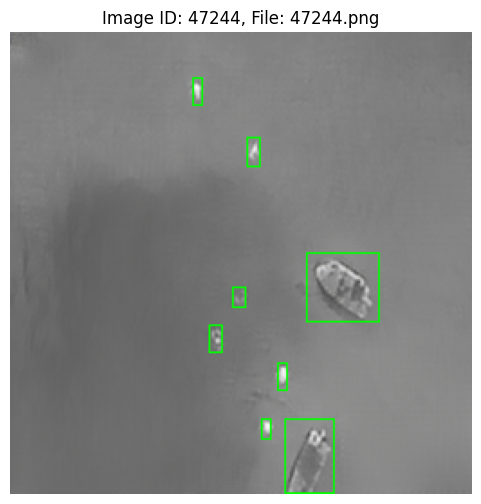

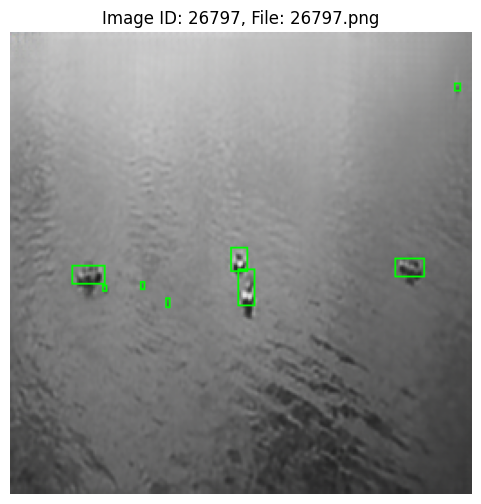

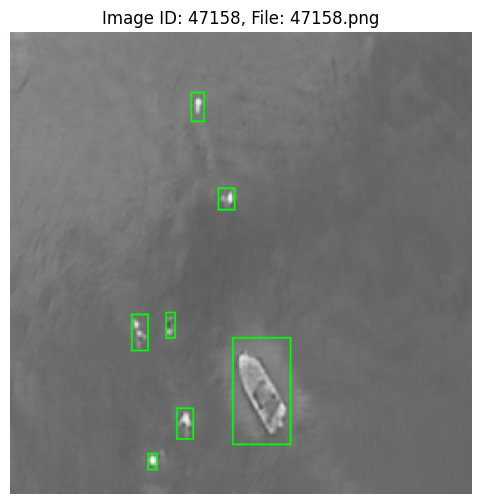

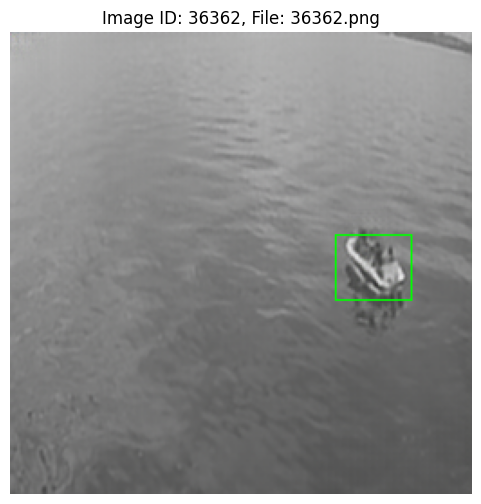

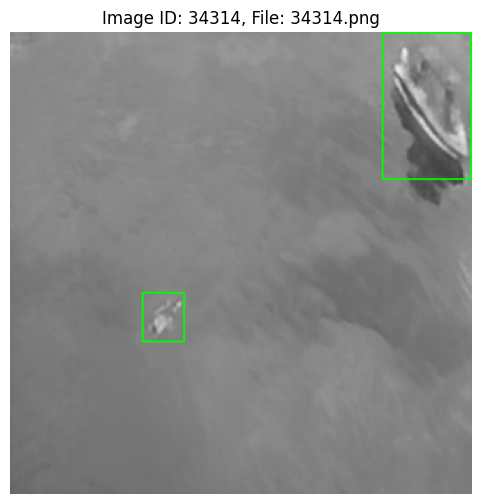

In [46]:
# --- Load COCO annotations ---
with open(r"./dataset/SeaDronesSee_IR/annotations/train.json", "r") as f:
    data = json.load(f)

# --- Create a mapping: image_id -> annotations ---
annotations_by_image = {}
for ann in data["annotations"]:
    annotations_by_image.setdefault(ann["image_id"], []).append(ann)

# --- Image folder ---
images_dir = Path("./dataset/SeaDronesSee_IR/images/train/")

# --- Randomly pick N images ---
N = 5
image_files = random.sample(list(images_dir.glob("*.png")), N)

for img_file in image_files:
    # Get image_id from file name assuming it's like "0.png", "1.png", etc.
    img_id = int(img_file.stem)
    
    # Load image
    img = cv2.imread(str(img_file))
    
    # Draw all bboxes for this image
    for ann in annotations_by_image.get(img_id, []):
        x, y, w, h = map(int, ann["bbox"])
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 1)
    
    # Display
    plt.figure(figsize=(6,6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Image ID: {img_id}, File: {img_file.name}")
    plt.axis("off")
    plt.show()


## COCO json to Yolo conversion

In [40]:
# --- Input and Output Paths ---
coco_json_path = "./dataset/SeaDronesSee_IR/annotations/val.json"
images_dir = "./dataset/SeaDronesSee_IR/images/val/"
output_labels_dir = "./dataset/SeaDronesSee_IR/labels/val/"

# --- Create output directory ---
os.makedirs(output_labels_dir, exist_ok=True)

# --- Load COCO JSON ---
with open(coco_json_path, "r") as f:
    coco = json.load(f)

# --- Create a mapping of category_id to class index (0-indexed for YOLO) ---
categories = {cat["id"]: i for i, cat in enumerate(coco["categories"])}
class_names = [cat["name"] for cat in coco["categories"]]

# --- Group annotations by image_id ---
annotations_by_image = {}
for ann in coco["annotations"]:
    annotations_by_image.setdefault(ann["image_id"], []).append(ann)

# --- Convert each image's annotations ---
for img in coco["images"]:
    file_name = img["file_name"]
    img_id = img["id"]
    img_w, img_h = img["width"], img["height"]
    anns = annotations_by_image.get(img_id, [])

    # Output .txt path (same name as image)
    txt_path = os.path.join(output_labels_dir, Path(file_name).stem + ".txt")

    yolo_lines = []
    for ann in anns:
        cat_id = ann["category_id"]
        class_id = categories[cat_id]

        x, y, w, h = ann["bbox"]
        x_center = (x + w / 2) / img_w
        y_center = (y + h / 2) / img_h
        w /= img_w
        h /= img_h

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

    # Write label file (empty if no annotations)
    with open(txt_path, "w") as f:
        f.write("\n".join(yolo_lines))

print(f"✅ Conversion complete! YOLO labels saved to: {output_labels_dir}")

# --- Save classes.txt file ---
classes_file = os.path.join(output_labels_dir, "classes.txt")
with open(classes_file, "w") as f:
    f.write("\n".join(class_names))

print(f"🧾 classes.txt saved with categories: {class_names}")


✅ Conversion complete! YOLO labels saved to: ./dataset/SeaDronesSee_IR/labels/val/
🧾 classes.txt saved with categories: ['person', 'boat']


In [ ]:
# Paths
def coco_json_to_yolo_data_format(coco_json_path, output_path):
    output_dir = Path(output_path)
    output_dir.mkdir(parents=True, exist_ok=True)
    
    with open(coco_json_path) as f:
        coco = json.load(f)
    
    # Map category IDs to YOLO IDs
    category_map = {cat["id"]: i for i, cat in enumerate(coco["categories"])}
    
    # Group annotations by image
    ann_dict = {}
    for ann in coco["annotations"]:
        img_id = ann["image_id"]
        ann_dict.setdefault(img_id, []).append(ann)
    
    # Convert
    for img in coco["images"]:
        img_id = img["id"]
        file_stem = Path(img["file_name"]).stem
        label_file = output_dir / f"{file_stem}.txt"
        
        lines = []
        for ann in ann_dict.get(img_id, []):
            cat_id = category_map[ann["category_id"]]
            x, y, w, h = ann["bbox"]
            
            # Convert to YOLO format (normalized)
            x_center = (x + w / 2) / img["width"]
            y_center = (y + h / 2) / img["height"]
            w /= img["width"]
            h /= img["height"]
    
            lines.append(f"{cat_id} {x_center} {y_center} {w} {h}")
    
        with open(label_file, "w") as f:
            f.write("\n".join(lines))

In [41]:
# --- Input and Output Paths ---
coco_json_path = "./dataset/SeaDronesSee_IR/annotations/train.json"
images_dir = "./dataset/SeaDronesSee_IR/images/val/"
output_labels_dir = "./dataset/SeaDronesSee_IR/labels/train/"

# --- Create output directory ---
os.makedirs(output_labels_dir, exist_ok=True)

# --- Load COCO JSON ---
with open(coco_json_path, "r") as f:
    coco = json.load(f)

# --- Create a mapping of category_id to class index (0-indexed for YOLO) ---
categories = {cat["id"]: i for i, cat in enumerate(coco["categories"])}
class_names = [cat["name"] for cat in coco["categories"]]

# --- Group annotations by image_id ---
annotations_by_image = {}
for ann in coco["annotations"]:
    annotations_by_image.setdefault(ann["image_id"], []).append(ann)

# --- Convert each image's annotations ---
for img in coco["images"]:
    file_name = img["file_name"]
    img_id = img["id"]
    img_w, img_h = img["width"], img["height"]
    anns = annotations_by_image.get(img_id, [])

    # Output .txt path (same name as image)
    txt_path = os.path.join(output_labels_dir, Path(file_name).stem + ".txt")

    yolo_lines = []
    for ann in anns:
        cat_id = ann["category_id"]
        class_id = categories[cat_id]

        x, y, w, h = ann["bbox"]
        x_center = (x + w / 2) / img_w
        y_center = (y + h / 2) / img_h
        w /= img_w
        h /= img_h

        yolo_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}")

    # Write label file (empty if no annotations)
    with open(txt_path, "w") as f:
        f.write("\n".join(yolo_lines))

print(f"✅ Conversion complete! YOLO labels saved to: {output_labels_dir}")

# --- Save classes.txt file ---
classes_file = os.path.join(output_labels_dir, "classes.txt")
with open(classes_file, "w") as f:
    f.write("\n".join(class_names))

print(f"🧾 classes.txt saved with categories: {class_names}")

✅ Conversion complete! YOLO labels saved to: ./dataset/SeaDronesSee_IR/labels/train/
🧾 classes.txt saved with categories: ['person', 'boat']
